# Landis Web Scraping

My process began by using BeatifulSoup to parse the webpages. I soon realized that the HTML tagging that BeatifulSoup encountered was too repetitive for simple xpath tagging. After multiple attempts to scrape Mecklenburg County website, I changed my approach. I tried using a scrapy to parse the information. Soon after, I realized that scrapy has a difficult time scraping information when a website contains javascript. 

With these two methods unhelpful, I turned to my next method, which was selenium. Selenium was intended for web automation, but has many more use cases, such as web scraping. 

For selenium to work, we needed to download a webdriver. My webdriver of choice is chrome. 

# Web Scraping

In [67]:
import csv
from selenium import webdriver
import pandas as pd
import numpy as np

In [68]:
driver = webdriver.Chrome()

In [69]:
# header of our csv file
# NOTE: only run this code once. If you run this code more than once, it will remove all prior information and recreate 'landis.csv'
with open('landis.csv','w') as f:
    f.write("name|address|land_use|total_apprasial_value|land_size|description|appraisal_neighborhood\n")
    
    # I use ' | ' character to seperate the columns because some of our elements contain commas. When we run our csv file
    # in python, we should note to our function that the delimiter is not a ',', rather '|'.

In [71]:
for n in range(1,41):
    """
    The reason why I have range(1,41) is due to the fact that Mecklenburg County website only hosts 40 pages of information.
    This is a common issue with websites now. It's very unusual to see an indvidiual go through 40 pages on a website. To host
    all this information will be expensive for the company, and not really needed. So websites say they offer a certain amount
    of information, but rarely do you get to see all of it. 
    """
    
    # The url used specifics houses in Charlotte, NC, and only Single Family Residentials
    url = 'https://property.spatialest.com/nc/mecklenburg/#/search/R100_luc:Charlotte%2C%20NC_srcterm/{}'.format(n)
    driver.get(url)
    
    
    # The section below provides selenium with the necessary xpath for each attribute. 
    name = driver.find_elements_by_xpath('//div[@class="col-md-4 col-sm-4 col-xs-12"]/ul/li[1]')
    address = driver.find_elements_by_xpath('//div[@class="col-md-4 col-sm-4 col-xs-12"]/ul/li[2]/span[2]')
    land_use = driver.find_elements_by_xpath('//div[@class="col-md-4 col-sm-4 col-xs-12"]/ul/li[3]/span[2]')
    total_apprasial_value = driver.find_elements_by_xpath('//div[@class = "col-md-3 col-sm-4  col-xs-12"]/ul/li[1]/span[2]')
    land_size = driver.find_elements_by_xpath('//div[@class = "col-md-3 col-sm-4  col-xs-12"]/ul/li[2]/span[2]')
    description = driver.find_elements_by_xpath('//div[@class = "col-md-3 col-sm-4  col-xs-12"]/ul/li[3]/span[2]')
    appraisal_neighborhood = driver.find_elements_by_xpath('//div[@class = "col-md-3 col-sm-4  col-xs-12"]/ul/li[4]/span[2]')
    
    # Just a visual to let us know if our scraper is working correctly. You should see 10 as the output.
    num_items = len(name)
    print(num_items)
    
    # Gathering the elements obtained from our scraper and appending it to our 'landis.csv'
    with open('landis.csv', 'a') as f:
        for i in range(num_items):
            f.write(name[i].text +"|"+ address[i].text +"|"+ land_use[i].text +"|"+ total_apprasial_value[i].text +"|"+ land_size[i].text +"|"+ description[i].text +"|"+ appraisal_neighborhood[i].text +"\n")
    """
    When you first run this code, selenium takes awhile to parse every single page. The for loop runs through each page.
    After the block has finished running, re-run this block to get the information into a csv file. Selenium has parsed through 
    every page so now our program can scrape the information needed.
    """

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [73]:
# After we finish scraping the necessary information, it's good habbit to close the driver when we're done
driver.close()

# Visualizing

Now that we are done with our scraper, we can begin to clean our dataframe so we can manipulate the data.

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('landis.csv', delimiter = '|')

In [92]:
df.head()

,name,address,land_use,total_apprasial_value,land_size,description,appraisal_neighborhood
0,03523123 BEAZER HOMES CORP (CROSSMAN COMMUNITI...,1000 VALLEYDALE RD CHARLOTTE NC,SFR,284800,12.1 ACRE,NaN,D501
1,07109433 GRIFFITH SARAH,1000 VANIZER ST CHARLOTTE NC,SFR,69600,1 LOT,L23 &24 B7 M3-95,G510
2,09710209 HOBBS JOHN FREDERICK,1000 VICKERY DR CHARLOTTE NC,SFR,87400,1 LOT,L8 B2 M9 379 1000 VICKERY PL,J711
3,07719211 BOYD ANNIE M,1000 WAINWRIGHT AV CHARLOTTE NC,SFR,62300,1 LOT,L10 B31 M4-676,H702
4,07321308 LUXITY LLC,1000 WESTBROOK DR CHARLOTTE NC,SFR,90000,1 LOT,L6A M58-228,H301


In [84]:
def money_convert(x, y):
    """
    Function to convert our dollar amount to a type int for manipulation.
    x = Dataframe being used
    y = column that needs to be converted, NOTE: need to include quotes, i.e. 'name'
    """
    x[y] = x[y].str.replace(',', '') # removes commas
    x[y] = x[y].str.replace('$', '') # removes dollar signs
    x[y] = x[y].astype(int) # converts to type int

In [90]:
money_convert(df, 'total_apprasial_value')

In [115]:
count = df.groupby(['appraisal_neighborhood']).count().reset_index()

In [116]:
count = count[['appraisal_neighborhood','name']]

In [119]:
mean_value = df.groupby(['appraisal_neighborhood']).mean().reset_index()

In [121]:
mean_value_count = pd.merge(mean_value,count)

In [124]:
mean_value_count = mean_value_count.sort_values(by= 'total_apprasial_value', ascending =False)

In [125]:
mean_value_count = mean_value_count[mean_value_count['name'] >=7]

In [180]:
# Mean_value_count is a dataframe that shows us each neighborhoods average price, along with the associated amount of homes in that neighborhood
# I choose to look at neighborhoods that had more than 7 houses
mean_value_count.head()

,appraisal_neighborhood,total_apprasial_value,name
59,W956,413820.000000,10
40,U732,378341.666667,12
42,U921,366476.470588,17
47,W312,220737.500000,8
34,T901,215163.636364,11


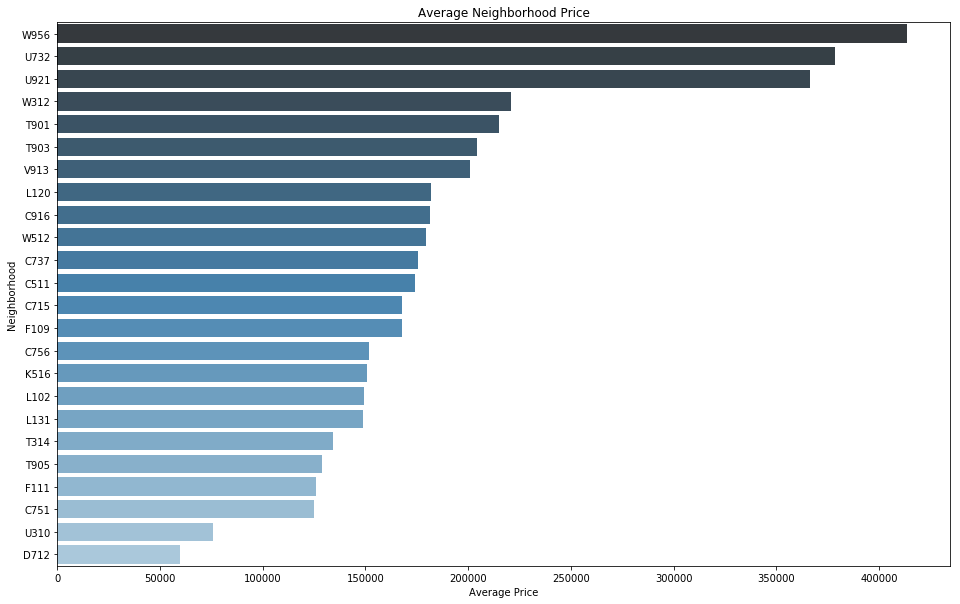

In [162]:
%matplotlib inline
apprasial_average = sns.barplot(y = mean_value_count['appraisal_neighborhood'], x = mean_value_count['total_apprasial_value'], palette="Blues_d")
plt.xlabel("Average Price")
plt.ylabel("Neighborhood")
plt.title("Average Neighborhood Price")
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show(apprasial_average)

The barplot above shows us the neighborhood, descending, with the highest property value. 

In [166]:
land_size_count = df.groupby(['land_size']).count().reset_index()

In [170]:
land_size_count = land_size_count[['land_size', 'name']].sort_values(by = 'name', ascending  = False)

In [181]:
land_size_count.head()

,land_size,name
2,1 LOT,386
4,2 LOT,6
0,0.77 SMALL ACRE,5
1,0.99 LOT,2
3,12.1 ACRE,1


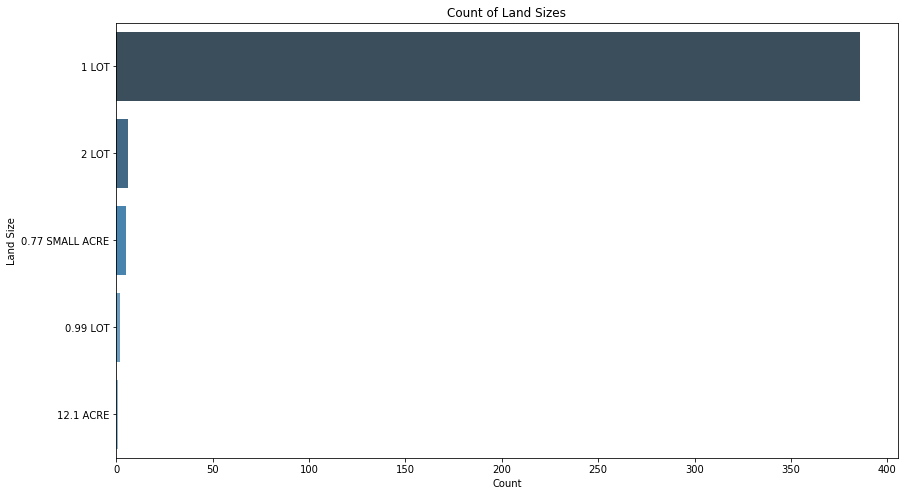

In [183]:
%matplotlib inline
land_count = sns.barplot(x = land_size_count['name'], y = land_size_count['land_size'],  palette="Blues_d")
plt.xlabel("Count")
plt.ylabel("Land Size")
plt.title("Count of Land Sizes")
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show(apprasial_average)

As we can see above, majority of the single family homes land size are grouped in 1 Lot. Only 1 house has 12.1 ACRE. 6 houses have 2 Lots.

# Additional Work

The work above is to show the Done vs. Perfect method. I webscraped basic information from Mecklenburg County website. Things I would add would be the overview information page that encompases more information per house (https://property.spatialest.com/nc/mecklenburg/#/property/31883). With this information, I could eventually create a Machine Learning model to predict housing prices in Charolette, NC based off the numerous data points. It would be interesting to see which houses are undervalued or overvalued. Along with that, I could set up a MySQL database. I had a blast working with different webscrapers and figuring out which method would work best. Eventually I would like to come back to this project and set up a AWS database, along with expanding my web scraper to gather more information.